Started some more runs with extra MLP layers, with varying levels of Dropout in each. Casually looking at the traces when they were running, it looked like the model with lower dropout converged faster, but the second with higher dropout reached a better final validation score.

In [2]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


Lower Dropout
=====

This model had two MLP layers, each with dropout set to 0.8.

In [15]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/8aug_extra_layers0p8_recent.pkl")

In [16]:
nll_channels = [c for c in m.monitor.channels.keys() if 'nll' in c]

In [21]:
def make_curves(model, *args):
    curves = None
    for c in args:
        channel = model.monitor.channels[c]
        c = c[0].upper() + c[1:]
        if not curves:
            curves = hl.Curve(zip(channel.example_record,channel.val_record),group=c)
        else:
            curves += hl.Curve(zip(channel.example_record,channel.val_record),group=c)
    return curves

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
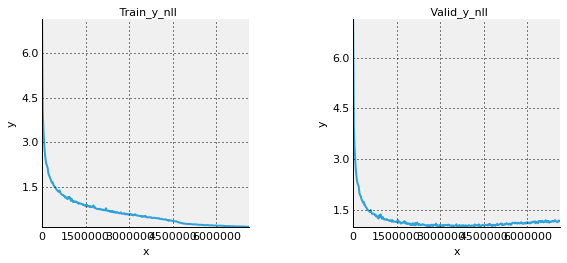

In [22]:
make_curves(m,*nll_channels)

It's definitely overfitting.

Higher Dropout
=====

The same model, with dropout set to 0.5 as we've been doing so far:

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
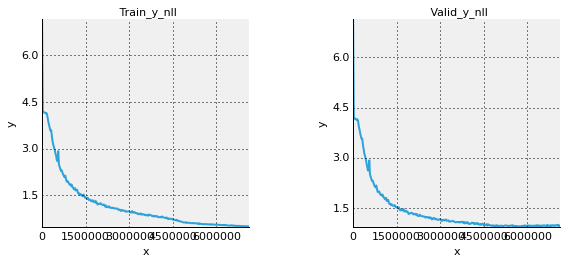

In [23]:
mh = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/8aug_extra_layers0p5_recent.pkl")
make_curves(mh,*nll_channels)

It takes longer to reach a slightly lower validation score, but does not overfit.

How slow is dropout?
=======

If we look at the difference in time to pass a validation score over the range we can see how much longer it takes the model using higher dropout.

In [34]:
cl = m.monitor.channels['valid_y_nll']
ch = mh.monitor.channels['valid_y_nll']
compare = []
for t,v in zip(cl.example_record,cl.val_record):
    for t2,v2 in zip(ch.example_record,ch.val_record):
        if v2 < v:
            compare.append((float(v),np.max([t2-t,0])))
            break

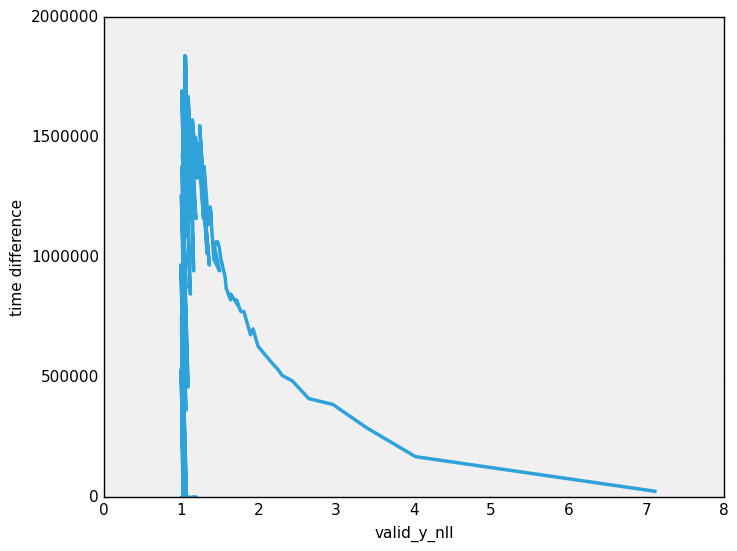

In [35]:
plt.plot(*zip(*compare))
plt.xlabel("valid_y_nll")
plt.ylabel("time difference")